In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


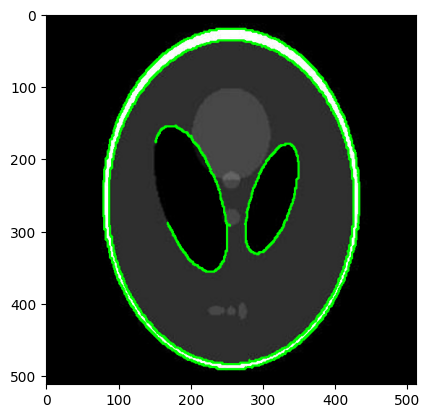

In [3]:
img = cv2.imread('brain.png')
img = cv2.resize(img,(512,512))
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret , threshold = cv2.threshold(imgray,20,255,0)
edges = cv2.Canny(imgray,100, 200)

contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# print("Number of contours = "+ str(len(contours)))
# print(contours[0])

cv2.drawContours(img,contours,-1,(0,255,0),2)

# cv2.imshow('Image',img)
# cv2.imshow('threshold',edges)
# cv2.imshow('image_gray',imgray)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img)
plt.savefig('./Photos/img.png')
plt.show()

In [35]:
img = cv2.imread('Ellipse65_linne_creme.jpg')
# img = cv2.resize(img,(512,512))
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret , threshold = cv2.threshold(imgray,20,255,0)
canny_img = cv2.Canny(imgray,100, 200)

masked_canny_img = cv2.min(canny_img, img)
xy_tuples = []

A = np.zeros((len(xy_tuples), 6), dtype=float)
for obsNdx in range(len(xy_tuples)):
    ((x, y), d) = xy_tuples[obsNdx]
    A[obsNdx, 0] = x**2
    A[obsNdx, 1] = x * y
    A[obsNdx, 2] = y**2
    A[obsNdx, 3] = x
    A[obsNdx, 4] = y
    A[obsNdx, 5] = 1
# Cf. https://stackoverflow.com/questions/1835246/how-to-solve-homogeneous-linear-equations-with-numpy
# Find the eigenvalues and eigenvector of A^T A
e_vals, e_vecs = np.linalg.eig(np.dot(A.T, A))

# Extract the eigenvector (column) associated with the minimum eigenvalue
z = e_vecs[:, np.argmin(e_vals)]

modeller = ransac.Modeler(ConicSection, number_of_trials=args.ransacNumberOfTrials, acceptable_error=args.ransacAcceptableError)
consensus_conic_section, inliers, outliers = modeller.ConsensusModel(xy_tuples)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


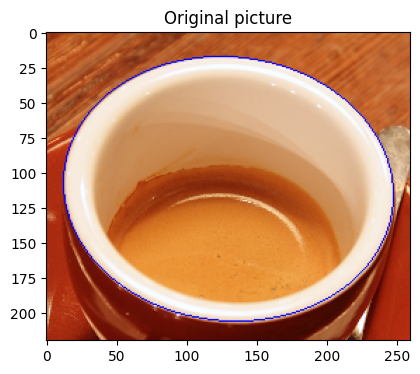

In [33]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = (int(round(x)) for x in best[1:5])
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

# ax2.set_title('Edge (white) and result (red)')
# ax2.imshow(edges)

plt.show()